# Linear Regression

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../data/weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


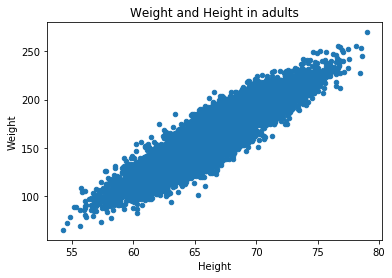

In [4]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

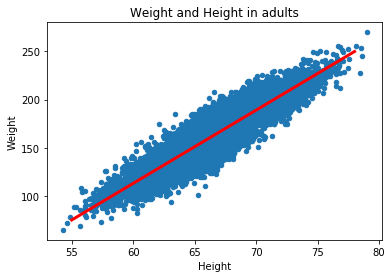

In [5]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

# Here we're plotting the red line 'by hand' with fixed values
# We'll try to learn this line with an algorithm below
plt.plot([55, 78], [75, 250], color='red', linewidth=3)

In [6]:
def line(x, w=0, b=0):
    return x * w + b

In [7]:
x = np.linspace(55, 80, 100)

In [8]:
x

array([ 55.        ,  55.25252525,  55.50505051,  55.75757576,
        56.01010101,  56.26262626,  56.51515152,  56.76767677,
        57.02020202,  57.27272727,  57.52525253,  57.77777778,
        58.03030303,  58.28282828,  58.53535354,  58.78787879,
        59.04040404,  59.29292929,  59.54545455,  59.7979798 ,
        60.05050505,  60.3030303 ,  60.55555556,  60.80808081,
        61.06060606,  61.31313131,  61.56565657,  61.81818182,
        62.07070707,  62.32323232,  62.57575758,  62.82828283,
        63.08080808,  63.33333333,  63.58585859,  63.83838384,
        64.09090909,  64.34343434,  64.5959596 ,  64.84848485,
        65.1010101 ,  65.35353535,  65.60606061,  65.85858586,
        66.11111111,  66.36363636,  66.61616162,  66.86868687,
        67.12121212,  67.37373737,  67.62626263,  67.87878788,
        68.13131313,  68.38383838,  68.63636364,  68.88888889,
        69.14141414,  69.39393939,  69.64646465,  69.8989899 ,
        70.15151515,  70.4040404 ,  70.65656566,  70.90

In [9]:
yhat = line(x, w=0, b=0)

In [10]:
yhat

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

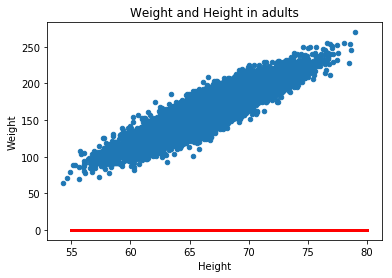

In [11]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(x, yhat, color='red', linewidth=3)

### Cost Function

In [12]:
def mean_squared_error(y_true, y_pred):
    s = (y_true - y_pred)**2
    return s.mean()

In [13]:
X = df[['Height']].values
y_true = df['Weight'].values

In [14]:
y_true

array([ 241.89356318,  162.31047252,  212.74085556, ...,  128.47531878,
        163.85246135,  113.64910268])

In [15]:
y_pred = line(X)

In [16]:
y_pred

array([[ 0.],
       [ 0.],
       [ 0.],
       ..., 
       [ 0.],
       [ 0.],
       [ 0.]])

In [17]:
mean_squared_error(y_true, y_pred.ravel())

27093.83757456157

### you do it!

Try changing the values of the parameters b and w in the line above and plot it again to see how the plot and the cost  change.

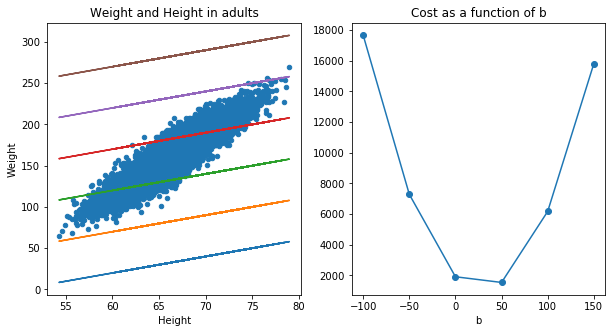

In [22]:
plt.figure(figsize=(10, 5))

# we are going to draw 2 plots in the same figure
# first plot, data and a few lines
ax1 = plt.subplot(121)
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults', ax=ax1)

# let's explore the cost function for a few values of b between -100 and +150
bbs = np.array([-100, -50, 0, 50, 100, 150])
mses = []  # we will append the values of the cost here, for each line
for b in bbs:
    y_pred = line(X, w=2, b=b)
    mse = mean_squared_error(y_true, y_pred)
    mses.append(mse)
    plt.plot(X, y_pred)

# second plot: Cost function
ax2 = plt.subplot(122)
plt.plot(bbs, mses, 'o-')
plt.title('Cost as a function of b')
plt.xlabel('b')

## Linear Regression with Keras

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

In [24]:
model = Sequential()

In [25]:
#units -> numero de salidas de la neurona
model.add(Dense(1, input_shape=(1,)))

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(Adam(lr=0.8), 'mean_squared_error')

In [28]:
model.fit(X, y_true, epochs=40)

Epoch 1/40
10000/10000 [==============================] - 0s - loss: 1014.3197     
Epoch 2/40
10000/10000 [==============================] - 0s - loss: 550.4582     
Epoch 3/40
10000/10000 [==============================] - 0s - loss: 532.9518     
Epoch 4/40
10000/10000 [==============================] - 0s - loss: 492.0272     
Epoch 5/40
10000/10000 [==============================] - 0s - loss: 436.0801     
Epoch 6/40
10000/10000 [==============================] - 0s - loss: 411.2952     
Epoch 7/40
10000/10000 [==============================] - 0s - loss: 361.5308     
Epoch 8/40
10000/10000 [==============================] - 0s - loss: 338.1872     
Epoch 9/40
10000/10000 [==============================] - 0s - loss: 319.9637     
Epoch 10/40
10000/10000 [==============================] - 0s - loss: 269.5706     
Epoch 11/40
10000/10000 [==============================] - 0s - loss: 248.9654     
Epoch 12/40
10000/10000 [==============================] - 0s - loss: 252.6796     


In [29]:
y_pred = model.predict(X)

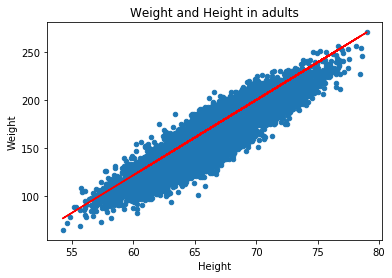

In [30]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(X, y_pred, color='red')

In [31]:
W, B = model.get_weights()

In [32]:
W

array([[ 7.83053112]], dtype=float32)

In [33]:
B

array([-348.34713745], dtype=float32)

## Evaluating Model Performance

In [29]:
from sklearn.metrics import r2_score

In [35]:
print("The R2 score is {:0.3f}".format(r2_score(y_true, y_pred)))

The R2 score is 0.760


### Train Test Split

In [13]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y_true,
                                                    test_size=0.2)

In [38]:
len(X_train)

8000

In [39]:
len(X_test)

2000

In [40]:
#reseteamos los pesos para volver a entrenar el modelo desde cero, pero ahora con train y test
W[0, 0] = 0.0
B[0] = 0.0
model.set_weights((W, B))

In [41]:
model.fit(X_train, y_train, epochs=50, verbose=0)

In [42]:
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()

In [18]:
from sklearn.metrics import mean_squared_error as mse

In [44]:
print("The Mean Squared Error on the Train set is:\t{:0.1f}".format(mse(y_train, y_train_pred)))
print("The Mean Squared Error on the Test set is:\t{:0.1f}".format(mse(y_test, y_test_pred)))

The Mean Squared Error on the Train set is:	149.3
The Mean Squared Error on the Test set is:	151.3


In [45]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.854
The R2 score on the Test set is:	0.859


# Classification

In [46]:
df = pd.read_csv('../data/user_visit_duration.csv')

In [47]:
df.head()

,Time (min),Buy
0,2.000000,0
1,0.683333,0
2,3.216667,1
3,0.900000,0
4,1.533333,1


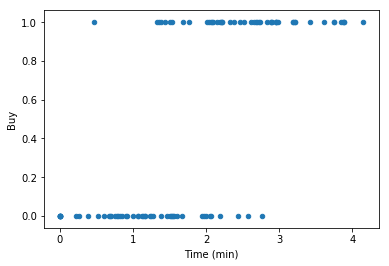

In [48]:
df.plot(kind='scatter', x='Time (min)', y='Buy')

In [49]:
model = Sequential()
model.add(Dense(1, input_shape=(1,), activation='sigmoid'))

In [50]:
model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [51]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [52]:
X = df[['Time (min)']].values
y = df['Buy'].values

model.fit(X, y, epochs=25)

Epoch 1/25
100/100 [==============================] - 0s - loss: 0.6339 - acc: 0.5900     
Epoch 2/25
100/100 [==============================] - 0s - loss: 0.5947 - acc: 0.6000     
Epoch 3/25
100/100 [==============================] - 0s - loss: 0.5719 - acc: 0.7600     
Epoch 4/25
100/100 [==============================] - 0s - loss: 0.5602 - acc: 0.6200     
Epoch 5/25
100/100 [==============================] - 0s - loss: 0.5865 - acc: 0.7200     
Epoch 6/25
100/100 [==============================] - 0s - loss: 0.4984 - acc: 0.7700     
Epoch 7/25
100/100 [==============================] - 0s - loss: 0.4877 - acc: 0.7900     
Epoch 8/25
100/100 [==============================] - 0s - loss: 0.4868 - acc: 0.8100     
Epoch 9/25
100/100 [==============================] - 0s - loss: 0.4683 - acc: 0.8200     
Epoch 10/25
100/100 [==============================] - 0s - loss: 0.4609 - acc: 0.8400     
Epoch 11/25
100/100 [==============================] - 0s - loss: 0.4625 - acc: 0.8200   

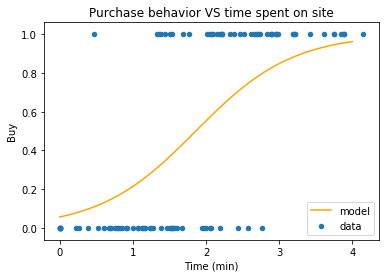

In [53]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
             title='Purchase behavior VS time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, model.predict(temp), color='orange')
plt.legend(['model', 'data'])

In [54]:
temp_class = model.predict(temp) > 0.5

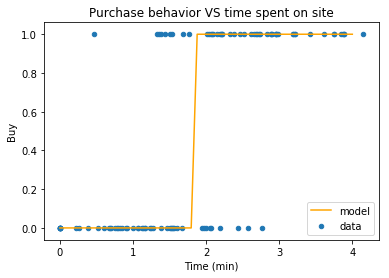

In [55]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
             title='Purchase behavior VS time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, temp_class, color='orange')
plt.legend(['model', 'data'])

In [56]:
y_pred = model.predict(X)
y_class_pred = y_pred > 0.5

In [21]:
from sklearn.metrics import accuracy_score

In [58]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, y_class_pred)))

The accuracy score is 0.820


### Train/Test split


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [60]:
#Ponemos los pesos a cero para volver a calcular el modelo usando train y test
params = model.get_weights()
params = [np.zeros(w.shape) for w in params]
model.set_weights(params)

In [61]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, model.predict(X) > 0.5)))

The accuracy score is 0.500


In [62]:
model.fit(X_train, y_train, epochs=25, verbose=0)

In [63]:
print("The train accuracy score is {:0.3f}".format(accuracy_score(y_train, model.predict(X_train) > 0.5)))
print("The test accuracy score is {:0.3f}".format(accuracy_score(y_test, model.predict(X_test) > 0.5)))

The train accuracy score is 0.812
The test accuracy score is 0.900


## Cross Validation

In [22]:
from keras.wrappers.scikit_learn import KerasClassifier

In [65]:
def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_shape=(1,), activation='sigmoid'))
    model.compile(SGD(lr=0.5),
                  'binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [66]:
#Es una capa para que la red nueronal se comporte como un modelo de sklearn y poder así usar sus métodos
model = KerasClassifier(build_fn=build_logistic_regression_model,
                        epochs=25,
                        verbose=0)

In [23]:
from sklearn.model_selection import cross_val_score, KFold

In [68]:
cv = KFold(3, shuffle=True)

In [69]:
scores = cross_val_score(model, X, y, cv=cv)

In [70]:
scores

array([ 0.79411765,  0.75757576,  0.84848485])

In [71]:
#mirar detalle de que salen los valores flotantes solo con 4 decimales en el format
print("The cross validation accuracy is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))

The cross validation accuracy is 0.8001 ± 0.0374


## Confusion Matrix

In [24]:
from sklearn.metrics import confusion_matrix

In [73]:
confusion_matrix(y, y_class_pred)

array([[41,  9],
       [ 9, 41]])

In [74]:
def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

In [75]:
pretty_confusion_matrix(y, y_class_pred, ['Not Buy', 'Buy'])

,Predicted Not Buy,Predicted Buy
Not Buy,41,9
Buy,9,41


In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [81]:
print("Precision:\t{:0.3f}".format(precision_score(y, y_class_pred)))
print("Recall:  \t{:0.3f}".format(recall_score(y, y_class_pred)))
print("F1 Score:\t{:0.3f}".format(f1_score(y, y_class_pred)))

Precision:	0.820
Recall:  	0.820
F1 Score:	0.820


In [26]:
from sklearn.metrics import classification_report

In [79]:
print(classification_report(y, y_class_pred))

             precision    recall  f1-score   support

          0       0.82      0.82      0.82        50
          1       0.82      0.82      0.82        50

avg / total       0.82      0.82      0.82       100



## Feature Preprocessing

### Categorical Features

In [82]:
df = pd.read_csv('../data/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [83]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [84]:
pd.get_dummies(df['Gender'], prefix='Gender').head()

,Gender_Female,Gender_Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


## Feature Transformations

#### 1) Rescale with fixed factor

In [85]:
df['Height (feet)'] = df['Height']/12.0
df['Weight (100 lbs)'] = df['Weight']/100.0

In [86]:
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs)
count,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61
std,3.85,32.11,0.32,0.32
min,54.26,64.70,4.52,0.65
25%,63.51,135.82,5.29,1.36
50%,66.32,161.21,5.53,1.61
75%,69.17,187.17,5.76,1.87
max,79.00,269.99,6.58,2.70


#### MinMax normalization

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [87]:
mms = MinMaxScaler()
df['Weight_mms'] = mms.fit_transform(df[['Weight']])
df['Height_mms'] = mms.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Weight_mms,Height_mms
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49
std,3.85,32.11,0.32,0.32,0.16,0.16
min,54.26,64.70,4.52,0.65,0.00,0.00
25%,63.51,135.82,5.29,1.36,0.35,0.37
50%,66.32,161.21,5.53,1.61,0.47,0.49
75%,69.17,187.17,5.76,1.87,0.60,0.60
max,79.00,269.99,6.58,2.70,1.00,1.00


#### 3) Standard normalization

In [28]:
from sklearn.preprocessing import StandardScaler

In [88]:
ss = StandardScaler()
df['Weight_ss'] = ss.fit_transform(df[['Weight']])
df['Height_ss'] = ss.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Weight_mms,Height_mms,Weight_ss,Height_ss
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49,0.00,0.00
std,3.85,32.11,0.32,0.32,0.16,0.16,1.00,1.00
min,54.26,64.70,4.52,0.65,0.00,0.00,-3.01,-3.15
25%,63.51,135.82,5.29,1.36,0.35,0.37,-0.80,-0.74
50%,66.32,161.21,5.53,1.61,0.47,0.49,-0.01,-0.01
75%,69.17,187.17,5.76,1.87,0.60,0.60,0.80,0.73
max,79.00,269.99,6.58,2.70,1.00,1.00,3.38,3.28


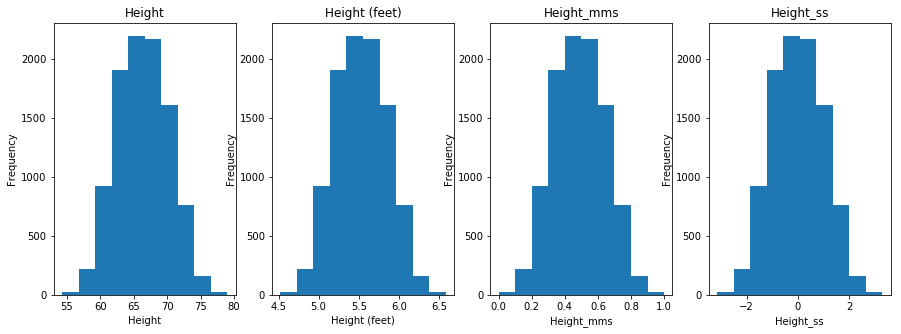

In [89]:
plt.figure(figsize=(15, 5))

for i, feature in enumerate(['Height', 'Height (feet)', 'Height_mms', 'Height_ss']):
    plt.subplot(1, 4, i+1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)

# Machine Learning Exercises

## Exercise 1

You've just been hired at a real estate investment firm and they would like you to build a model for pricing houses. You are given a dataset that contains data for house prices and a few features like number of bedrooms, size in square feet and age of the house. Let's see if you can build a model that is able to predict the price. In this exercise we extend what we have learned about linear regression to a dataset with more than one feature. Here are the steps to complete it:

1. Load the dataset ../data/housing-data.csv
- plot the histograms for each feature
- create 2 variables called X and y: X shall be a matrix with 3 columns (sqft,bdrms,age) and y shall be a vector with 1 column (price)
- create a linear regression model in Keras with the appropriate number of inputs and output
- split the data into train and test with a 20% test size
- train the model on the training set and check its accuracy on training and test set
- how's your model doing? Is the loss growing smaller?
- try to improve your model with these experiments:
    - normalize the input features with one of the rescaling techniques mentioned above
    - use a different value for the learning rate of your model
    - use a different optimizer
- once you're satisfied with training, check the R2score on the test set

In [2]:
df = pd.read_csv('../data/housing-data.csv')
df.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


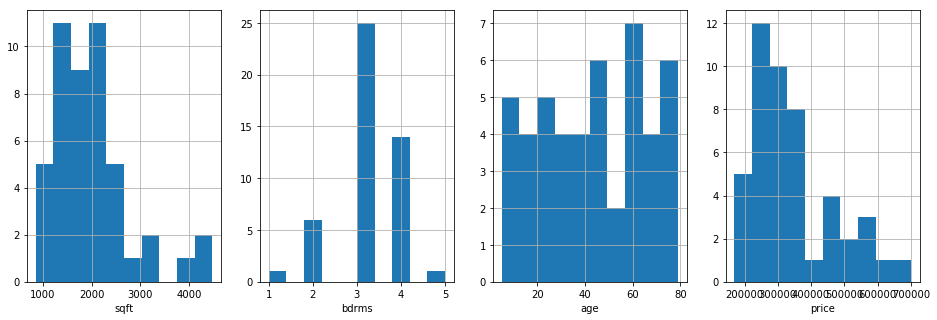

In [32]:
plt.figure(figsize=(16,5))
plt.subplot(141)
df['sqft'].hist()
plt.xlabel('sqft')
plt.subplot(142)
df['bdrms'].hist()
plt.xlabel('bdrms')
plt.subplot(143)
df['age'].hist()
plt.xlabel('age')
plt.subplot(144)
df['price'].hist()
plt.xlabel('price')
plt.show()

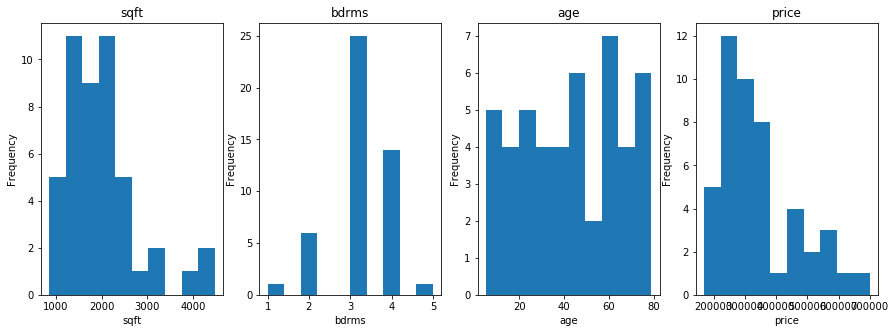

In [31]:
# plot the histograms for each feature
plt.figure(figsize=(15, 5))
for i, feature in enumerate(df.columns):
    plt.subplot(1, 4, i+1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)

In [39]:
X = df[['sqft','bdrms','age']].values
Y = df.price.values

In [40]:
model = Sequential()
model.add(Dense(1, input_shape=(3,)))
model.compile(Adam(lr=0.8), 'mean_squared_error')

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.2)

In [42]:
model.fit(X_train, y_train)

Epoch 1/10
37/37 [==============================] - 0s - loss: 135365270002.1622     
Epoch 2/10
37/37 [==============================] - 0s - loss: 132872778835.0270     
Epoch 3/10
37/37 [==============================] - 0s - loss: 130301889120.8649     
Epoch 4/10
37/37 [==============================] - 0s - loss: 127902890260.7568     
Epoch 5/10
37/37 [==============================] - 0s - loss: 125462182607.5676     
Epoch 6/10
37/37 [==============================] - 0s - loss: 123086793755.6757     
Epoch 7/10
37/37 [==============================] - 0s - loss: 120714622809.9459     
Epoch 8/10
37/37 [==============================] - 0s - loss: 118373334154.3784     
Epoch 9/10
37/37 [==============================] - 0s - loss: 116039442432.0000     
Epoch 10/10
37/37 [==============================] - 0s - loss: 113703150675.0270     


In [43]:
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()

In [44]:
print("The Mean Squared Error on the Train set is:\t{:0.1f}".format(mse(y_train, y_train_pred)))
print("The Mean Squared Error on the Test set is:\t{:0.1f}".format(mse(y_test, y_test_pred)))

The Mean Squared Error on the Train set is:	111547977131.9
The Mean Squared Error on the Test set is:	92551740242.4


In [45]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	-5.400
The R2 score on the Test set is:	-12.071


#### Nota:
Como los números que usamos en el precio son muy grandes, la predición se parezca, el mínimo error nos dara un gran resultado por el tamaño de los números, por eso lo suyo sería escalar las variables entre 0 y 1

##### Normalizamos y volvemos a ejecutar el proceso

In [35]:
mms = MinMaxScaler()
df['sqft1000'] = mms.fit_transform(df['sqft'])
df['age10'] = mms.fit_transform(df['age'])
df['price100k'] = mms.fit_transform(df['price'])

/home/javier/anaconda3/envs/ztdl/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)
/home/javier/anaconda3/envs/ztdl/lib/python3.5/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/javier/anaconda3/envs/ztdl/lib/python3.5/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, Deprecatio

In [36]:
X = df[['sqft1000', 'bdrms', 'age10']].values
y = df['price100k'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [37]:
model = Sequential()
model.add(Dense(1, input_dim=3))
model.compile(Adam(lr=0.1), 'mean_squared_error')
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
37/37 [==============================] - 0s - loss: 1.7000     
Epoch 2/20
37/37 [==============================] - 0s - loss: 0.3972     
Epoch 3/20
37/37 [==============================] - 0s - loss: 0.4552     
Epoch 4/20
37/37 [==============================] - 0s - loss: 0.5335     
Epoch 5/20
37/37 [==============================] - 0s - loss: 0.3641     
Epoch 6/20
37/37 [==============================] - 0s - loss: 0.2342     
Epoch 7/20
37/37 [==============================] - 0s - loss: 0.2264     
Epoch 8/20
37/37 [==============================] - 0s - loss: 0.2374     
Epoch 9/20
37/37 [==============================] - 0s - loss: 0.2047     
Epoch 10/20
37/37 [==============================] - 0s - loss: 0.1419     
Epoch 11/20
37/37 [==============================] - 0s - loss: 0.1255     
Epoch 12/20
37/37 [==============================] - 0s - loss: 0.1565     
Epoch 13/20
37/37 [==============================] - 0s - loss: 0.1644     
Epoch 14/20
37/37 [==

In [38]:
# once you're satisfied with training, check the R2score on the test set

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.337
The R2 score on the Test set is:	-0.152


## Exercise 2

Your boss was extremely happy with your work on the housing price prediction model and decided to entrust you with a more challenging task. They've seen a lot of people leave the company recently and they would like to understand why that's happening. They have collected historical data on employees and they would like you to build a model that is able to predict which employee will leave next. The would like a model that is better than random guessing. They also prefer false negatives than false positives, in this first phase. Fields in the dataset include:

- Employee satisfaction level
- Last evaluation
- Number of projects
- Average monthly hours
- Time spent at the company
- Whether they have had a work accident
- Whether they have had a promotion in the last 5 years
- Department
- Salary
- Whether the employee has left

Your goal is to predict the binary outcome variable `left` using the rest of the data. Since the outcome is binary, this is a classification problem. Here are some things you may want to try out:

1. load the dataset at ../data/HR_comma_sep.csv, inspect it with `.head()`, `.info()` and `.describe()`.
- Establish a benchmark: what would be your accuracy score if you predicted everyone stay?
- Check if any feature needs rescaling. You may plot a histogram of the feature to decide which rescaling method is more appropriate.
- convert the categorical features into binary dummy columns. You will then have to combine them with the numerical features using `pd.concat`.
- do the usual train/test split with a 20% test size
- play around with learning rate and optimizer
- check the confusion matrix, precision and recall
- check if you still get the same results if you use a 5-Fold cross validation on all the data
- Is the model good enough for your boss?

As you will see in this exercise, the a logistic regression model is not good enough to help your boss. In the next chapter we will learn how to go beyond linear models.

This dataset comes from https://www.kaggle.com/ludobenistant/hr-analytics/ and is released under [CC BY-SA 4.0 License](https://creativecommons.org/licenses/by-sa/4.0/).

In [46]:
df = pd.read_csv('../data/HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [48]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [49]:
# Establish a benchmark: what would be your accuracy score if you predicted everyone stay?

df.left.value_counts() / len(df)

0    0.761917
1    0.238083
Name: left, dtype: float64

In [50]:
### Solo predecir ceros, nos da una accuracy del 76%

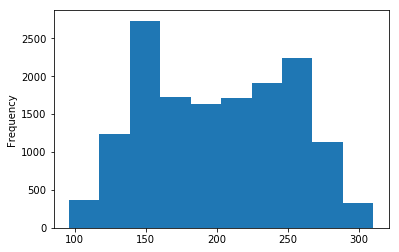

In [51]:
# Check if any feature needs rescaling.
# You may plot a histogram of the feature to decide which rescaling method is more appropriate.
df['average_montly_hours'].plot(kind='hist')

In [52]:
df['average_montly_hours_100'] = df['average_montly_hours']/100.0

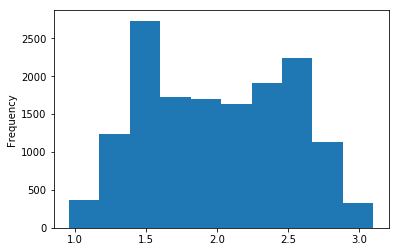

In [53]:
df['average_montly_hours_100'].plot(kind='hist')

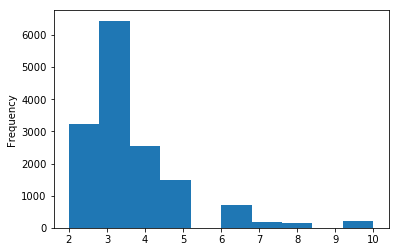

In [54]:
df['time_spend_company'].plot(kind='hist')

In [55]:
# convert the categorical features into binary dummy columns.
# You will then have to combine them with
# the numerical features using `pd.concat`.
df_dummies = pd.get_dummies(df[['sales', 'salary']])

In [57]:
df_dummies.head()

,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0


In [58]:
X = pd.concat([df[['satisfaction_level', 'last_evaluation', 'number_project',
                   'time_spend_company', 'Work_accident',
                   'promotion_last_5years', 'average_montly_hours_100']],
               df_dummies], axis=1).values
y = df['left'].values

In [59]:
# do the usual train/test split with a 20% test size

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [60]:
# play around with learning rate and optimizer

model = Sequential()
model.add(Dense(1, input_dim=20, activation='sigmoid'))
model.compile(Adam(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [61]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 21        
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.fit(X_train, y_train)

Epoch 1/10
11999/11999 [==============================] - 0s - loss: 0.5479 - acc: 0.7593     
Epoch 2/10
11999/11999 [==============================] - 0s - loss: 0.5321 - acc: 0.7676     
Epoch 3/10
11999/11999 [==============================] - 0s - loss: 0.5346 - acc: 0.7670     
Epoch 4/10
11999/11999 [==============================] - 0s - loss: 0.5615 - acc: 0.7656     
Epoch 5/10
11999/11999 [==============================] - 0s - loss: 0.5365 - acc: 0.7664     
Epoch 6/10
11999/11999 [==============================] - 0s - loss: 0.5280 - acc: 0.7694     
Epoch 7/10
11999/11999 [==============================] - 0s - loss: 0.5648 - acc: 0.7624     
Epoch 8/10
11999/11999 [==============================] - 0s - loss: 0.5465 - acc: 0.7671     
Epoch 9/10
11999/11999 [==============================] - 0s - loss: 0.5759 - acc: 0.7631     
Epoch 10/10
11999/11999 [==============================] - 0s - loss: 0.5347 - acc: 0.7651     


In [63]:
y_test_pred = model.predict_classes(X_test)

2720/3000 [==========================>...] - ETA: 0s

In [64]:
def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

In [65]:
# check the confusion matrix, precision and recall

pretty_confusion_matrix(y_test, y_test_pred, labels=['Stay', 'Leave'])

,Predicted Stay,Predicted Leave
Stay,2116,165
Leave,448,271


In [66]:
print(classification_report(y_test, y_test_pred))

             precision    recall  f1-score   support

          0       0.83      0.93      0.87      2281
          1       0.62      0.38      0.47       719

avg / total       0.78      0.80      0.78      3000



In [67]:
# check if you still get the same results if you use a 5-Fold cross validation on all the data

def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_dim=20, activation='sigmoid'))
    model.compile(Adam(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=build_logistic_regression_model,
                        epochs=10, verbose=0)

In [68]:
cv = KFold(5, shuffle=True)
scores = cross_val_score(model, X, y, cv=cv)

print("The cross validation accuracy is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))

The cross validation accuracy is 0.7855 ± 0.0061


In [69]:
scores

array([ 0.78566667,  0.77366667,  0.79066667,  0.789     ,  0.78826275])